In [129]:
from fsl_mrs.utils import mrs_io
from fsl_mrs.utils.misc import FIDToSpec
from fsl_mrs.utils.preproc import nifti_mrs_proc

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [221]:
# Read data
fsl = mrs_io.read_FID('fsl_mrs/metab.nii.gz')
fsl = nifti_mrs_proc.apply_fixed_phase(fsl,-25)
fslw = mrs_io.read_FID('fsl_mrs/wref.nii.gz')

osprey = mrs_io.read_FID('osprey/sub-01_ses-01_mrs_sub-01_ses-01_SVS_A.nii.gz')
ospreyw = mrs_io.read_FID('osprey/sub-01_ses-01_mrs_sub-01_ses-01_SVS-ref_REF.nii.gz')

spant = mrs_io.read_FID('spant/proc_supressed.nii.gz')
spantw = mrs_io.read_FID('spant/proc_wref.nii.gz')

In [222]:
# norm_fsl = fsl.mrs().get_spec().real.max()
# norm_osprey = osprey.mrs().get_spec().real.max()
# norm_spant = spant.mrs().get_spec().real.max()
norm_fsl = np.abs(fsl.mrs().FID).max()
norm_osprey = np.abs(osprey.mrs().FID).max()
norm_spant = np.abs(spant.mrs().FID).max()
print(norm_fsl)
print(norm_osprey)
print(norm_spant)

6.1362436e-05
5.9418657903619874e-05
0.000456229056695027


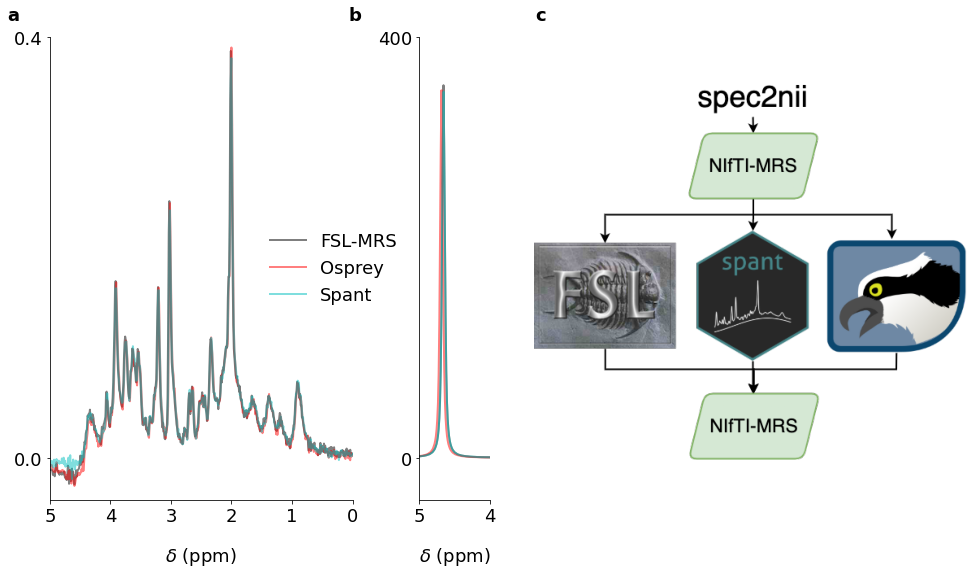

In [332]:
plt.rcParams.update({'font.size': 18})
import matplotlib as mpl
# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["k","r", "c"]) 

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1,3,1)
ax1.plot(fsl.mrs().getAxes(ppmlim=(0,5)), fsl.mrs().get_spec(ppmlim=(0,5)).real/norm_fsl, label='FSL-MRS',linewidth=2,alpha=0.5)
ax1.plot(osprey.mrs().getAxes(ppmlim=(0,5)), osprey.mrs().get_spec(ppmlim=(0,5)).real/norm_osprey, label='Osprey',linewidth=2,alpha=0.5)
ax1.plot(spant.mrs().getAxes(ppmlim=(0,5)), spant.mrs().get_spec(ppmlim=(0,5)).real/norm_spant, label='Spant',linewidth=2,alpha=0.5)
ax1.set_xlim([5, 0])
ax1.set_yticks([0,0.4])
ax1.set_xticks([0, 1,2,3,4,5])
ax1.set_ylim([-0.04, 0.4])
ax1.set_xlabel('$\delta$ (ppm)',labelpad=20)
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# ax1.spines['bottom'].set_visible(False)
# ax1.spines['left'].set_visible(False)
ax1.set_facecolor((1.0, 1.0, 1.0, 0.0))
ax1.legend(loc=5, frameon=False, bbox_to_anchor=(0.7, 0.25, 0.5, 0.5))
pos = ax1.get_position()
pos.x0 += 0.2
ax1.set_position(pos)

ax2 = fig.add_subplot(1,3,2)

ax2.plot(fslw.mrs().getAxes(ppmlim=(0,5)), fslw.mrs().get_spec(ppmlim=(0,5)).real/norm_fsl, label='FSL-MRS',linewidth=2,alpha=0.5)
ax2.plot(ospreyw.mrs().getAxes(ppmlim=(0,5)), ospreyw.mrs().get_spec(ppmlim=(0,5)).real/norm_osprey, label='Osprey',linewidth=2,alpha=0.5)
ax2.plot(spantw.mrs().getAxes(ppmlim=(0,5)), spantw.mrs().get_spec(ppmlim=(0,5)).real/norm_spant, label='Spant',linewidth=2,alpha=0.5)
ax2.set_xlim([5, 4])
ax2.set_yticks([0,0.4E3])
ax2.set_ylim([-0.04E3, 0.4E3])
ax2.set_xlabel('$\delta$ (ppm)',labelpad=20)
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_facecolor((1.0, 1.0, 1.0, 0.0))
ax2.patch.set_alpha(0)
plt.tight_layout()
pos = ax2.get_position()
pos.x1 -= 0.215
ax2.set_position(pos)

ax3 = fig.add_subplot(1,3,3)
image = plt.imread('fig_5_diagram.png')
ax3.imshow(image)
ax3.axis('off') 
pos = ax3.get_position()
pos.y1 += 0.1
pos.y0 -= 0.1
pos.x0 -= 0.275
pos.x1 -= 0.075
ax3.set_position(pos)
ax3.text(-650,-70,'a',fontweight='bold')
ax3.text(-230,-70,'b',fontweight='bold')
ax3.text(-0,-70,'c',fontweight='bold')
# plt.show()
plt.savefig('../figure5.png', bbox_inches='tight', dpi=300)